<h1>Getting datasets from google drive to workspace </h1>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!cp -r "/content/drive/MyDrive/final_antispoofing.zip" "/content"

In [8]:
import zipfile
archive = zipfile.ZipFile('/content/final_antispoofing.zip')
archive.extractall('/content')

<h1>Data Preprocessing </h1>

<h2> Four Steps </h2>
<h3>Step 1: Create new directory structure for the datasets</h3>
<h3>Step 2: Copying images into new directory structure </h3>
<h3>Step 3: Dataset Exploration </h3>
<h4> Step 4: Dataset Visualization </h3>

<h3>Step 1 </h1>

<h2>Original VS New Directory Structure</h2>

In [10]:
dataset_dir = '/content/final_antispoofing'
train_dataset_dir = '/content/final_antispoofing/train'
test_dataset_dir = '/content/final_antispoofing/test'

In [11]:
import os
os.mkdir('/content/antispoofing_dataset')
os.mkdir('/content/antispoofing_dataset/train')
os.mkdir('/content/antispoofing_dataset/test')
os.mkdir('/content/antispoofing_dataset/train/real')
os.mkdir('/content/antispoofing_dataset/train/spoof')
os.mkdir('/content/antispoofing_dataset/test/real')
os.mkdir('/content/antispoofing_dataset/test/spoof')

In [12]:
train_dir='/content/antispoofing_dataset/train'
test_dir = '/content/antispoofing_dataset/test'

<h3>Step 2 </h3>

In [15]:
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [14]:
def train_test_splits(data_directory):
  for split_type in os.listdir(data_directory):
    path_to_split_type = os.path.join(data_directory,split_type)
    for category in os.listdir(path_to_split_type):
      path_to_category = os.path.join(path_to_split_type,category)
      for subject in os.listdir(path_to_category):
        path_to_subject = os.path.join(path_to_category,subject)
        for img in os.listdir(path_to_subject):
          if split_type == 'train':
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(train_dir,category,img))
          else:
            shutil.copy(os.path.join(path_to_subject,img),os.path.join(test_dir,category,img))

In [16]:
train_test_splits(data_directory=dataset_dir)

<h3>Step 3 </h3>

<h3>Dataset Exploration </h3>

In [17]:
categories = ['real','spoof']

In [18]:
print("---------------------Exploring Training Datasets--------------------")
for category in categories:
  path = os.path.join(train_dir,category)
  if category == 'real':
    r1 = len(os.listdir(path))
  else:
    s1 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in training directory".format(r1+s1))

print("-----------------------Exploring Testing Datasets-------------------------")
for category in categories:
  path = os.path.join(test_dir,category)
  if category == 'real':
    r2 = len(os.listdir(path))
  else:
    s2 = len(os.listdir(path))
  print("There are {} images in {} directory".format(len(os.listdir(path)),category))
print("There are {} total images in testing directory".format(r2+s2))

---------------------Exploring Training Datasets--------------------
There are 2102 images in real directory
There are 2118 images in spoof directory
There are 4220 total images in training directory
-----------------------Exploring Testing Datasets-------------------------
There are 477 images in real directory
There are 474 images in spoof directory
There are 951 total images in testing directory


<h3>Step 4 : Dataset Visualization </h3>

In [20]:
def get_images(data_dir,number_of_samples):
  image_path = []
  for category in categories:
    path = os.path.join(data_dir,category)
    i = 1
    for img in os.listdir(path):
      if i > number_of_samples:
        break
      else:
        image_path.append(os.path.join(path,img))
        i += 1
  return image_path

In [21]:
def visualize_dataset(image_path,rows,cols):
  fig = plt.figure(figsize=(20,20))
  for i in range(1,rows * cols + 1):
    fig.add_subplot(rows,cols,i)
    img_array = cv2.imread(image_path[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.xlabel(image_path[i-1].split('/')[-2])
  plt.show()


In [22]:
training_image_path = get_images(data_dir= train_dir,number_of_samples=25)
print(training_image_path)
print(len(training_image_path))

['/content/antispoofing_dataset/train/real/Sudeep Subedi30.jpg', '/content/antispoofing_dataset/train/real/WIN_20201110_13_21_20_Pro.jpg', '/content/antispoofing_dataset/train/real/Sudeep Subedi32hr_flip.jpg', '/content/antispoofing_dataset/train/real/None12.jpg', '/content/antispoofing_dataset/train/real/Suraj Khanal11.jpg', '/content/antispoofing_dataset/train/real/WIN_20201110_10_11_40_Prohr_flip.jpg', '/content/antispoofing_dataset/train/real/dfjksjf32.jpg', '/content/antispoofing_dataset/train/real/Sumit tamang33.jpg', '/content/antispoofing_dataset/train/real/dfjsdfjk10.jpg', '/content/antispoofing_dataset/train/real/Sudeep Subedi4hr_flipbrightness0.76.jpg', '/content/antispoofing_dataset/train/real/Samir tamang13.jpg', '/content/antispoofing_dataset/train/real/WIN_20201110_13_23_05_Probrightness1.07.jpg', '/content/antispoofing_dataset/train/real/dfgyhjnmk20.jpg', '/content/antispoofing_dataset/train/real/Suraj Khanal22brightness1.31.jpg', '/content/antispoofing_dataset/train/re

<h3>Training Dataset Visualization</h3>

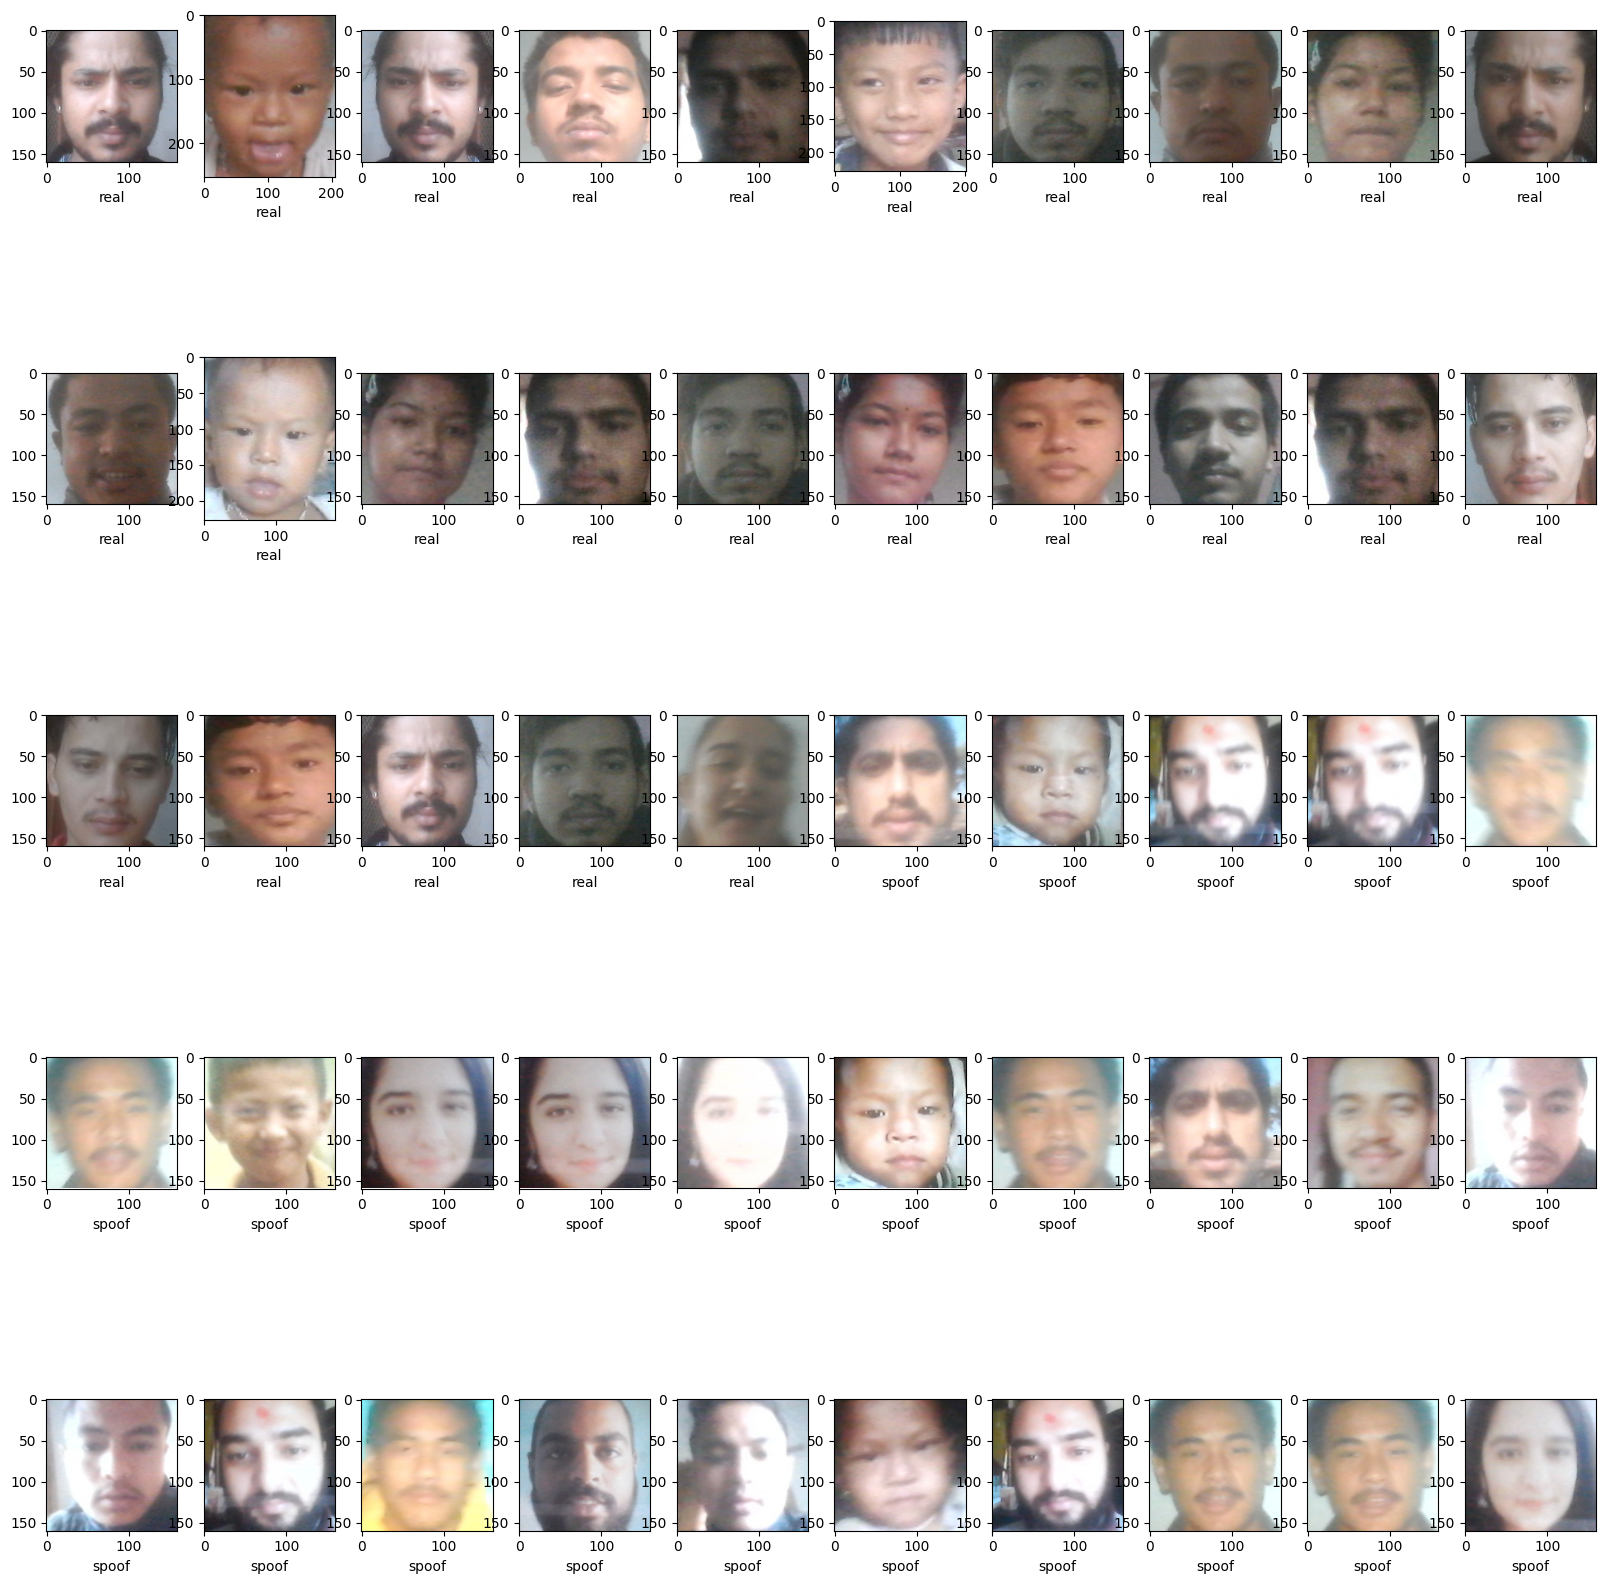

In [23]:
visualize_dataset(image_path=training_image_path,rows=5,cols=10)

Testing Dataset Visualization

In [24]:
testing_image_path = get_images(data_dir= test_dir,number_of_samples=25)
print(testing_image_path)
print(len(testing_image_path))

['/content/antispoofing_dataset/test/real/received_176938154134707.jpg', '/content/antispoofing_dataset/test/real/rftfyhbjnk33.jpg', '/content/antispoofing_dataset/test/real/Sumit tamang42.jpg', '/content/antispoofing_dataset/test/real/Sudeep Subedi21brightness0.54.jpg', '/content/antispoofing_dataset/test/real/ddfgfhg48.jpg', '/content/antispoofing_dataset/test/real/hehehe20.jpg', '/content/antispoofing_dataset/test/real/WIN_20201110_13_23_35_Prohr_flip.jpg', '/content/antispoofing_dataset/test/real/WIN_20201110_10_12_10_Prohr_flipbrightness0.64.jpg', '/content/antispoofing_dataset/test/real/Rihan Ale21.jpg', '/content/antispoofing_dataset/test/real/kjdfjsdkfj21.jpg', '/content/antispoofing_dataset/test/real/Sunil Koirala36brightness0.64.jpg', '/content/antispoofing_dataset/test/real/WIN_20201110_13_23_24_Pro.jpg', '/content/antispoofing_dataset/test/real/rftfyhbjnk8.jpg', '/content/antispoofing_dataset/test/real/Sunil Koirala41.jpg', '/content/antispoofing_dataset/test/real/Sunil Koi

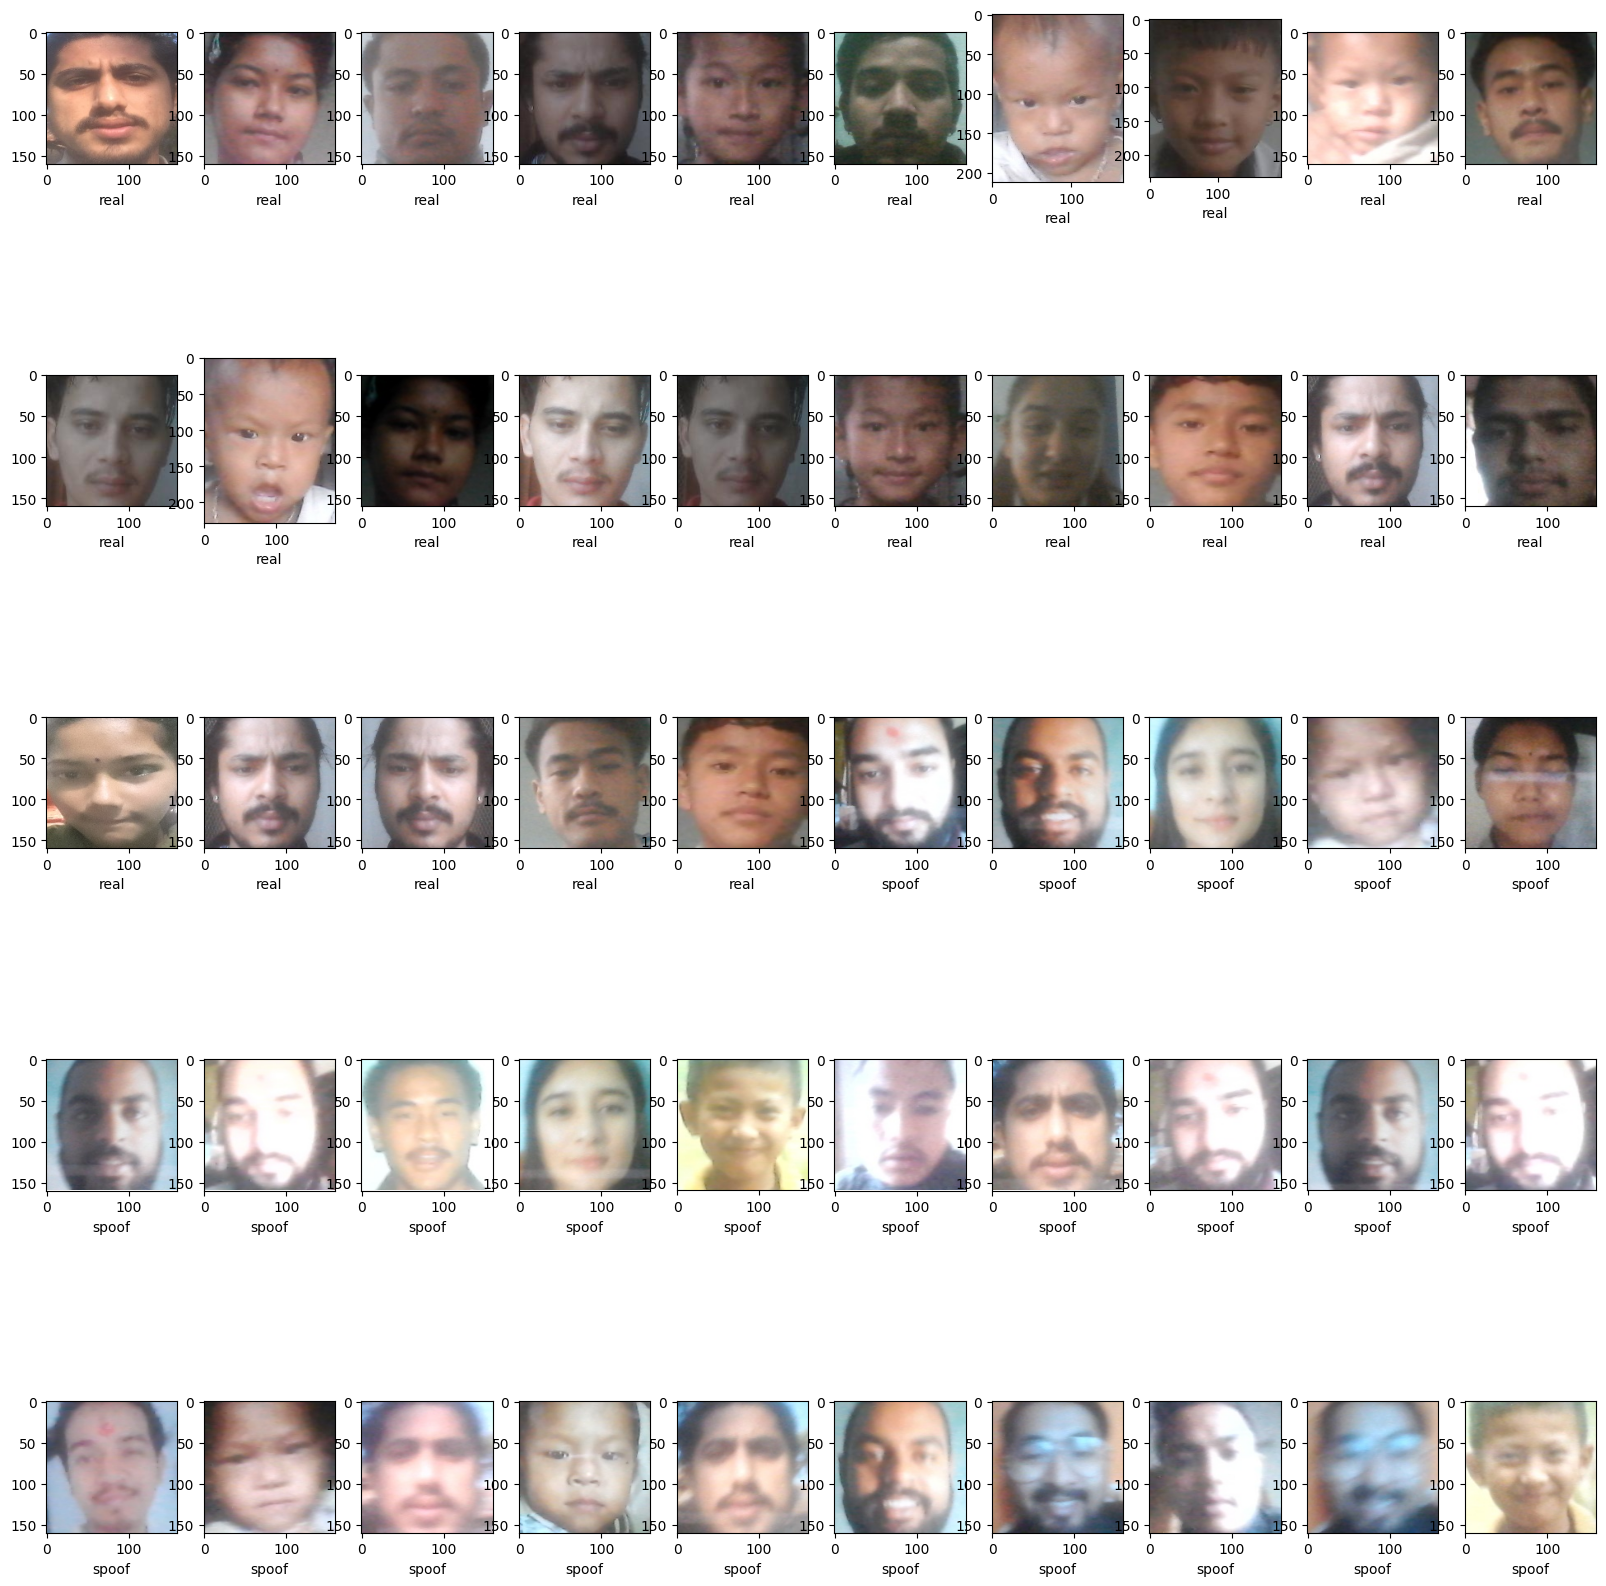

In [25]:
visualize_dataset(image_path=testing_image_path,rows=5,cols=10)

**<h3>Model Preparation</h3>**

<h3>Steps In Model Preparation</h3>
<h4>1. Choosing Framework and importing necessary libraries </h2>
<h4> 2. Load datasets and Perform image augmentations </h2>
<h4> 3. Model Selection  </h3>
<h4> 4. Compiling our model </h4>
<h4> 5. Setting our model checkpoints </h4>


<h4>Step 1 Keras Framework </h1>

In [26]:
from keras.layers import Dense,Dropout,Input,Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.models import model_from_json
import json

<h4>Step 2 </h4>

In [27]:
train_datagen = ImageDataGenerator(brightness_range=(0.8,1.2),rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,fill_mode='nearest',shear_range=0.2,zoom_range=0.3,rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25,shuffle=True)

Found 4220 images belonging to 2 classes.


In [29]:
valid_generator = valid_datagen.flow_from_directory(test_dir,target_size=(160,160),color_mode='rgb',
                                                    class_mode='binary',batch_size=25)

Found 951 images belonging to 2 classes.


<h4>Step 3 Model Selection and Transfer Learning</h4>

In [32]:
mobilenet = MobileNetV2(weights="imagenet",include_top=False,input_tensor=Input(shape=(160,160,3)))

9406464/9406464 [==============================] - 0s 0us/step


In [33]:
mobilenet.trainable = False

In [34]:
output = Flatten()(mobilenet.output)
output = Dropout(0.3)(output)
output = Dense(units = 8,activation='relu')(output)
prediction = Dense(1,activation='sigmoid')(output)

In [35]:
model = Model(inputs = mobilenet.input,outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[0][0]']        

<h4>Step 4 Compiling the models </h4>

In [36]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(
    learning_rate=0.000001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
),
  metrics=['accuracy']
)

<h4>Step 5 Setting our model checkpoints </h4>

In [37]:
import os
os.mkdir('/content/model_weights/')

In [38]:
model_checkpoint = ModelCheckpoint('./model_weights/finalyearproject_antispoofing_model_{epoch:02d}-{val_accuracy:.6f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True,save_weights_only=True)

In [39]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 25,
    validation_data = valid_generator,
    validation_steps = valid_generator.samples // 25,
    epochs = 100,
    callbacks=[model_checkpoint])

<ipython-input-39-8407492c0264>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
168/168 [==============================] - ETA: 0s - loss: 1.0997 - accuracy: 0.5066
Epoch 1: val_loss improved from inf to 0.78204, saving model to ./model_weights/finalyearproject_antispoofing_model_01-0.584211.h5
168/168 [==============================] - 48s 223ms/step - loss: 1.0997 - accuracy: 0.5066 - val_loss: 0.7820 - val_accuracy: 0.5842
Epoch 2/100
168/168 [==============================] - ETA: 0s - loss: 0.8409 - accuracy: 0.5344
Epoch 2: val_loss improved from 0.78204 to 0.68064, saving model to ./model_weights/finalyearproject_antispoofing_model_02-0.624211.h5
168/168 [==============================] - 37s 223ms/step - loss: 0.8409 - accuracy: 0.5344 - val_loss: 0.6806 - val_accuracy: 0.6242
Epoch 3/100
168/168 [==============================] - ETA: 0s - loss: 0.7499 - accuracy: 0.5783
Epoch 3: val_loss improved from 0.68064 to 0.62478, saving model to ./model_weights/finalyearproject_antispoofing_model_03-0.685263.h5
168/168 [==============================]

In [41]:
# serialize model to JSON
model_json = model.to_json()
with open("finalyearproject_antispoofing_model_mobilenet.json", "w") as json_file:
    json_file.write(model_json)

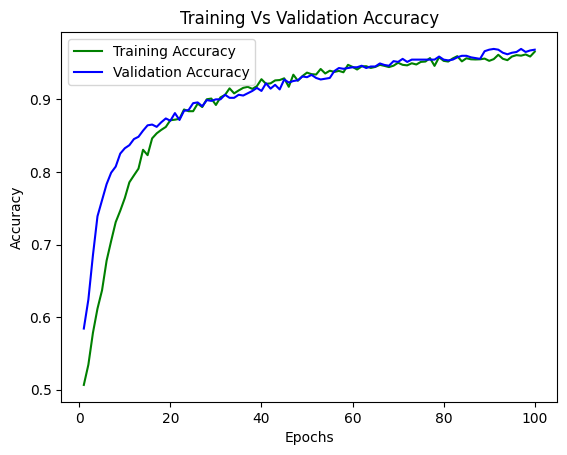

In [42]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs,train_accuracy,'g',label='Training Accuracy')
plt.plot(epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


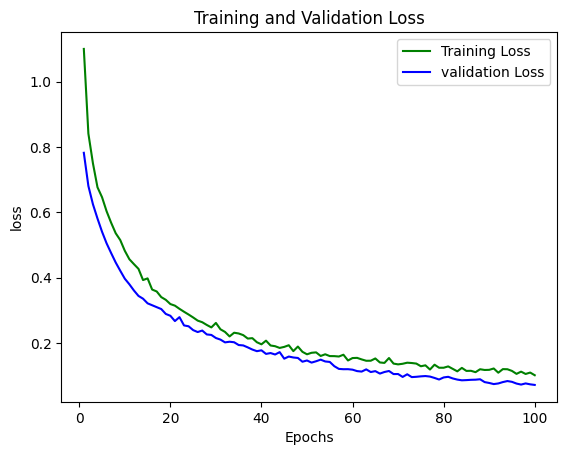

In [44]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs,train_loss,'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [45]:
from keras.preprocessing import image
import numpy as np
def check_fakes(path,category_type):
  predictor = {}
  path= os.path.join(path,category_type)
  for img in os.listdir(path):
    try:
      img = image.load_img(os.path.join(path,img),target_size=(160,160))
      img = image.img_to_array(img)
      img = np.expand_dims(img,axis=0)
      img = img / 255.0
      prediction = model.predict(img)
      if prediction > 0.5:
        prediction_class = 1
      else:
        prediction_class = 0
      result = categories[prediction_class]
      if result not in predictor:
        predictor[result] = 1
      else:
        predictor[result] += 1
    except Exception as e:
      pass
  return predictor

In [46]:
check_fakes(test_dir,categories[1])

1/1 [==============================] - 0s 32ms/step


{'spoof': 447, 'real': 27}

In [47]:
check_fakes(test_dir,categories[0])

1/1 [==============================] - 0s 36ms/step


{'real': 474, 'spoof': 3}